<a href="https://colab.research.google.com/github/kondurunikhil/cmpe255_group/blob/Alekhya/Data_Preprocessing_Bag_of_words_Alekhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from google.colab import files
import io
from matplotlib import style
import pathlib
import warnings
warnings.filterwarnings('ignore')
import wordcloud

#Loading the dataset

In [ ]:
sms_data = files.upload()

Saving SMSspam.csv to SMSspam.csv


In [ ]:
data = pd.read_csv("SMSspam.csv",encoding="utf-8")
data

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.tail()

,Class,input Text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.dtypes

Class         object
input Text    object
dtype: object

In [ ]:
data.shape

(5574, 2)

In [ ]:
data.describe

<bound method NDFrame.describe of      Class                                         input Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham              Will √º b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [ ]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [ ]:
data['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [ ]:
data['input Text'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                 4
                                                                                                                                                      

In [ ]:
data.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
ham         4827   4518                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

            
      freq  
Class       
ham     30  
spam     4

In [ ]:
print("length of dataset: ", len(data))

length of dataset:  5574


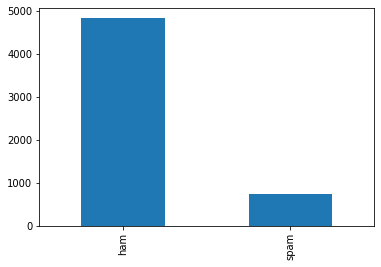

In [ ]:
data.Class.value_counts().plot.bar();

In [ ]:
data['spam'] = data['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head()

,Class,input Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
data['length'] = data['input Text'].apply(len)

In [ ]:
data.head()

,Class,input Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<Figure size 432x288 with 0 Axes>

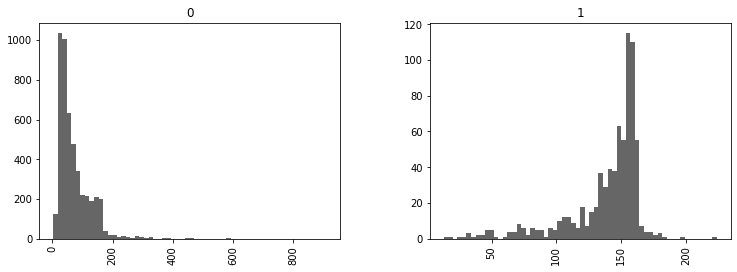

<Figure size 432x288 with 0 Axes>

In [ ]:
data.hist(column='length',by='spam',bins=60,figsize=(12,4),color='black',alpha=0.6);
plt.figure()

Text(0.5, 0, 'Message Length')

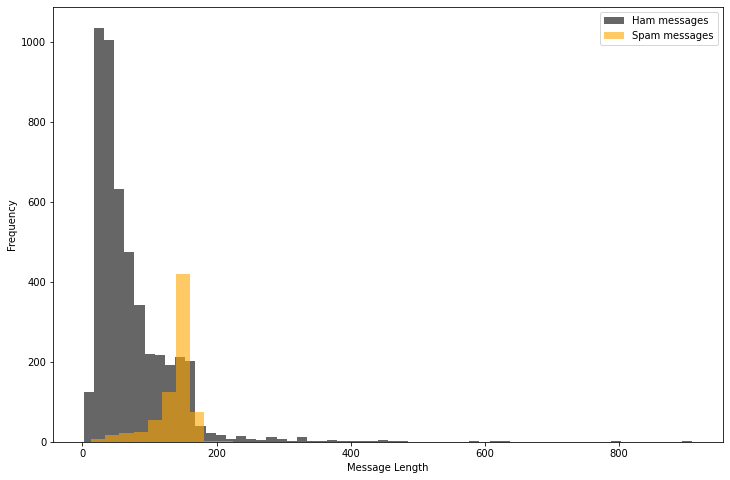

In [ ]:
plt.figure(figsize=(12, 8))

data[data.Class=='ham'].length.plot(bins=60, kind='hist', color='black', 
                                       label='Ham messages', alpha=0.6)
data[data.Class=='spam'].length.plot(kind='hist', color='orange', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
ham  = data[data['spam'] == 0].copy()
spam = data[data['spam'] == 1].copy()

In [ ]:
def show_wordcloud(data, title):
    text = ' '.join(data['input Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',colormap='inferno', width=800, height=800).generate(text)
    
    plt.figure(figsize=(10,10))#, frameon=True
    plt.imshow(fig_wordcloud)  
    #plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

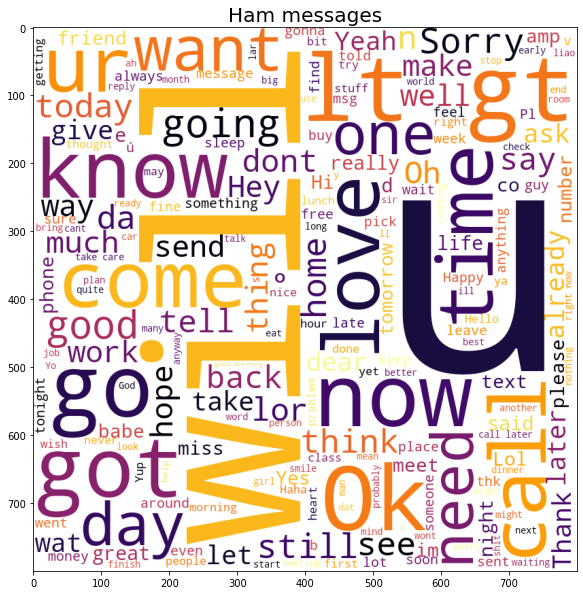

In [ ]:
show_wordcloud(ham, "Ham messages")

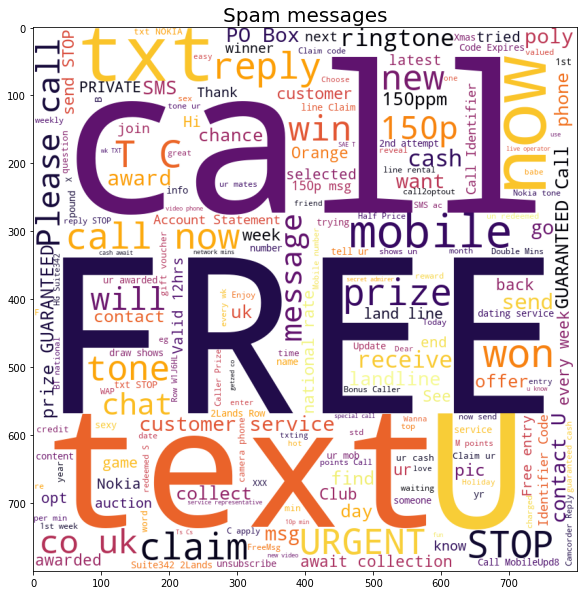

In [ ]:
show_wordcloud(spam, "Spam messages")

#Data Preprocessing

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")[10:15]

["you've", "you'll", "you'd", 'your', 'yours']

In [ ]:
def remove_punctuation_and_stopwords(message):
    
    message_without_punc = [ch for ch in message if ch not in string.punctuation]
    message_without_punc = "".join(message_without_punc).split()
    
    message_without_punc_stopwords = \
        [word.lower() for word in message_without_punc if word.lower() not in stopwords.words("english")]
        
    return message_without_punc_stopwords

In [ ]:
check = data['input Text'].apply(remove_punctuation_and_stopwords)

In [ ]:
check[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [ ]:
check[1]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

#Visualization after preprocessing

In [ ]:
from collections import Counter

In [ ]:
spam.loc[:, 'input Text'] = spam['input Text'].apply(remove_punctuation_and_stopwords)
words_spam = spam['input Text'].tolist()

In [ ]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [ ]:
c_spam = Counter(list_spam_words)
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

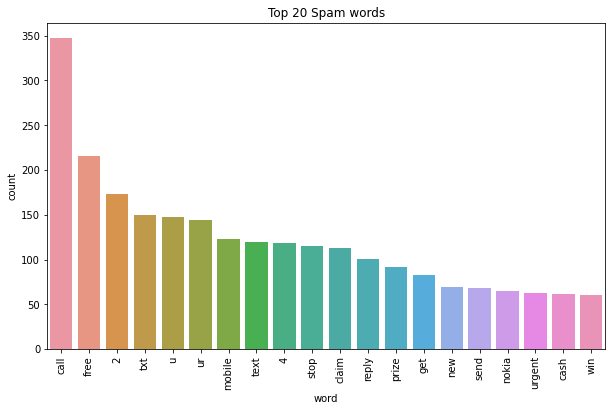

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical');

#Bag of Words

In [ ]:
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['input Text'])

In [ ]:
print(len(bow_transformer.vocabulary_))

9532


In [ ]:
sample_spam = data['input Text'][2]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)

print(bow_sample_spam)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 416)	1
  (0, 423)	1
  (0, 436)	1
  (0, 849)	1
  (0, 1242)	1
  (0, 2316)	1
  (0, 2541)	1
  (0, 3152)	2
  (0, 3290)	2
  (0, 3415)	1
  (0, 3571)	1
  (0, 5345)	1
  (0, 6738)	1
  (0, 6791)	1
  (0, 6848)	1
  (0, 8233)	1
  (0, 8398)	1
  (0, 8610)	1
  (0, 9117)	1
  (0, 9160)	1


In [ ]:
print(bow_transformer.get_feature_names()[3152])
print(bow_transformer.get_feature_names()[3290])

entry
fa


In [ ]:
bow_data = bow_transformer.transform(data['input Text'])

In [ ]:
print('Shape of Sparse Matrix: ', bow_data.shape)
print('Amount of Non-Zero occurences: ', bow_data.nnz)

Shape of Sparse Matrix:  (5574, 9532)
Amount of Non-Zero occurences:  50111


In [ ]:
sparsity = (100.0 * bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0
